In [39]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.core import Spin
from IPython.display import Image
import scipy.constants as sc



import numpy as np


from pymatgen import Lattice, Structure, Molecule
with MPRester("kVModF0coZpRa7Ku") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961678")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-961678")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-961678")

# Détermination de la bande interdite

In [40]:
Band_Gap = bandstructure.get_band_gap()
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
Band_Energy = Band_Gap['energy']
Band_Gap_Type = Band_Gap.get("direct")
Band_Gap_Transition = Band_Gap.get('transition')
distance = data.get('ticks').get('distance')

if Band_Gap_Type == False:
    Type = "Indirecte"
if Band_Gap_Type == True:
    Type = "Directe"

#print(data)
print("Analyse de la bande interdite")
print(" ")
print("Niveau d'énergie de la bande interdite :",str(Band_Energy),"eV")
print("Type de bande interdite :", str(Type))
print("Transition dans la bande :", str(Band_Gap_Transition))
print(" ")
print("Le niveau d'énergie de la bande interdite étant de", str(Band_Energy),", on peut considérer le matériau comme un conducteur éléctrique. ")
print("La bande étant de type",str(Type),", cela nous informe que la différence entre les vecteurs d'onde de l'état de plus basse énergie de la bande de conduction et l'état de plus haute énergie de la bande de valence est non nulle.")
plot = BSPlotter(bandstructure)
#plot.get_plot()

Analyse de la bande interdite
 
Niveau d'énergie de la bande interdite : 0.8646000000000003 eV
Type de bande interdite : Indirecte
Transition dans la bande : \Gamma-(0.238,0.000,0.238)
 
Le niveau d'énergie de la bande interdite étant de 0.8646000000000003 , on peut considérer le matériau comme un conducteur éléctrique. 
La bande étant de type Indirecte , cela nous informe que la différence entre les vecteurs d'onde de l'état de plus basse énergie de la bande de conduction et l'état de plus haute énergie de la bande de valence est non nulle.


# Analyse de la dernière bande de valence et de la première bande de conduction (non demandé mais intéressant)

In [41]:
vbm = bandstructure.get_vbm()
cbm = bandstructure.get_cbm()
#print(vbm)
VBM_Index = vbm.get('band_index')
VBM_Energy = vbm.get('energy')
cbm_Index = cbm.get('band_index')
cbm_Energy = cbm.get('energy')
print("Dernière bande de valence : \n")
print("-Les positions du maximum de la bande de valence(VBM) sont :",VBM_Index)
print("-On considère donc que la dernière bande de valence est la 12.")
print("-Le niveau d'énergie du VBM est de :",str(VBM_Energy),"eV")
print(" ")
print("Première bande de conduction : \n")
print("-La position du minimum de la bande de conduction(CBM) est:", str(cbm_Index))
print("-La bande contenant le cbm est donc la bande 13, c'est la première bande de conduction.")
print("-Le niveau d'énergie du CBM est de :",str(cbm_Energy),"eV")

Dernière bande de valence : 

-Les positions du maximum de la bande de valence(VBM) sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]})
-On considère donc que la dernière bande de valence est la 12.
-Le niveau d'énergie du VBM est de : 7.2502 eV
 
Première bande de conduction : 

-La position du minimum de la bande de conduction(CBM) est: defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})
-La bande contenant le cbm est donc la bande 13, c'est la première bande de conduction.
-Le niveau d'énergie du CBM est de : 8.1148 eV


# Graphe montrant les dispersions des bandes

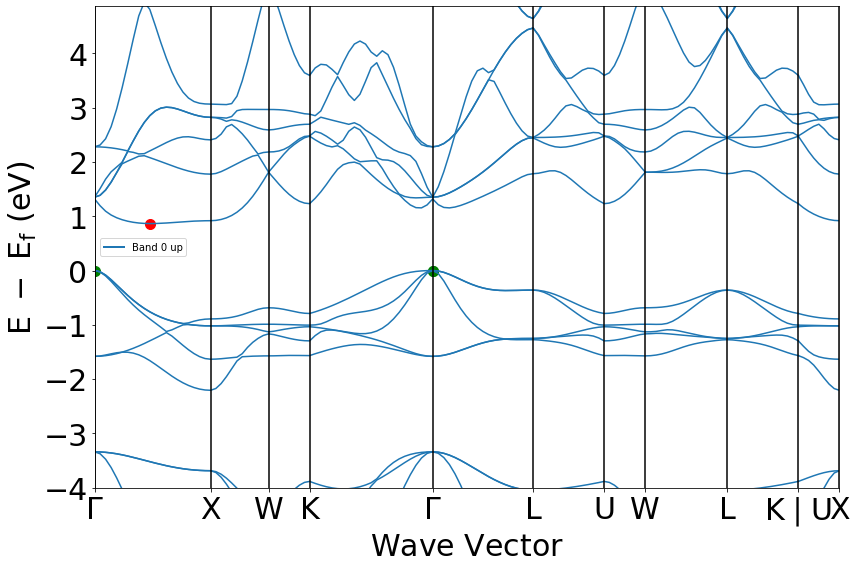

In [42]:
plot = BSPlotter(bandstructure).get_plot(vbm_cbm_marker=True)
plot.show()

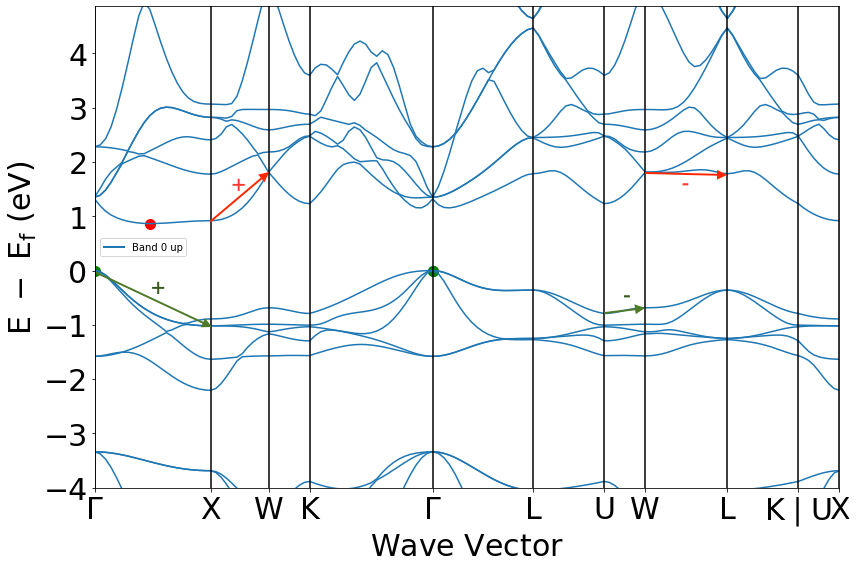

In [43]:
Image(filename='Plot.png')


In [44]:
print("Nous avons ici le plot inital et le plot initial avec les flèches montrant les plus grandes et petites dispersions.\n")
print("Pour la dernière bande de valence :")
print("-La direction avec la plus grande dispersion est : X-W")
print("-La direction avec la plus petite dispersion est : W-L \n")
print("Pour la première bande de conduction :")
print("-La direction avec la plus grande dispersion est : Γ-X")
print("-La direction avec la plus petite dispersion est : U-W")


Nous avons ici le plot inital et le plot initial avec les flèches montrant les plus grandes et petites dispersions.

Pour la dernière bande de valence :
-La direction avec la plus grande dispersion est : X-W
-La direction avec la plus petite dispersion est : W-L 

Pour la première bande de conduction :
-La direction avec la plus grande dispersion est : Γ-X
-La direction avec la plus petite dispersion est : U-W


# Calcul de la masse effective

Pour le calcul des masses effectives, on considère une dispersion parabolique.  L'équation d'une parabole est ax^2+bx+c.  Sa dérivée seconde vaut donc 2a.




In [75]:
h_bar = 6.5821e-16
m_el = 9.11e-31

Kpoint_CBM = cbm['kpoint'].cart_coords
Kpoint_VBM = vbm['kpoint'].cart_coords

m_vbm = (h_bar**2 * (Kpoint_VBM[0]**2+Kpoint_VBM[1]**2+Kpoint_VBM[2]**2))/(2*abs(VBM_Energy))
m_cbm = (h_bar**2 * (Kpoint_CBM[0]**2+Kpoint_CBM[1]**2+Kpoint_CBM[2]**2))/(2*abs(cbm_Energy))

print('La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique =', m_cbm, 'kg',"=", m_cbm/m_el, "m_e")
print(" ")
print('La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique =', m_vbm, 'kg', '=',  m_vbm/m_el, 'm_e')

print("Cette valeur de masse effective nulle n'est pas normale (ou cela implique peut-etre un potentiel nul).  De plus dans l'analyse de la bande de valence, nous avons vu que celle-ci était non nulle. On peut regarder ce qui cause cette valeur.")
print("Nous voyons que ce sont les valeurs de Kpoint_VBM qui posent problèmes, étant nulles", Kpoint_VBM)

La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique = 6.46701283511327e-33 kg = 0.0070988066247127 m_e
 
La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique = 0.0 kg = 0.0 m_e
Cette valeur de masse effective nulle n'est pas normale (ou cela implique peut-etre un potentiel nul).  De plus dans l'analyse de la bande de valence, nous avons vu que celle-ci était non nulle. On peut regarder ce qui cause cette valeur.
Nous voyons que ce sont les valeurs de Kpoint_VBM qui posent problèmes, étant nulles [0. 0. 0.]
